In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 51)

In [5]:
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         Female
1         Female
2         Female
3           Male
4           Male
           ...  
101761      Male
101762    Female
101763      Male
101764    Female
101765      Male
Name: gender, Length: 101766, dtype: object>
<bound method IndexOpsMixin.value_counts of 0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         ?
1         ?

In [6]:
df.var()   # number_emergency --  8.657786e-01 as var tendiing to 0 , can be dropped.

id                          8.630350e+08
encounter_id                1.053503e+16
patient_nbr                 1.497408e+15
admission_type_id           2.089189e+00
discharge_disposition_id    2.788015e+01
admission_source_id         1.651675e+01
time_in_hospital            8.910868e+00
num_lab_procedures          3.870805e+02
num_procedures              2.909777e+00
num_medications             6.605733e+01
number_outpatient           1.605961e+00
number_emergency            8.657786e-01
number_inpatient            1.594824e+00
number_diagnoses            3.738810e+00
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [8]:
for i in df.columns:
    df[i]=df[i].map(lambda x: np.nan if x=="?" else x)

In [9]:
(df.isnull().sum()/len(df))*100

id                           0.000000
encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide 

<Axes: >

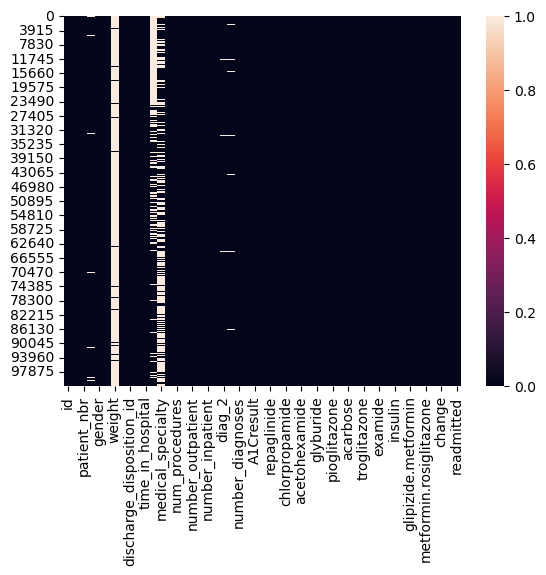

In [10]:
sns.heatmap(df.isnull())

<Axes: >

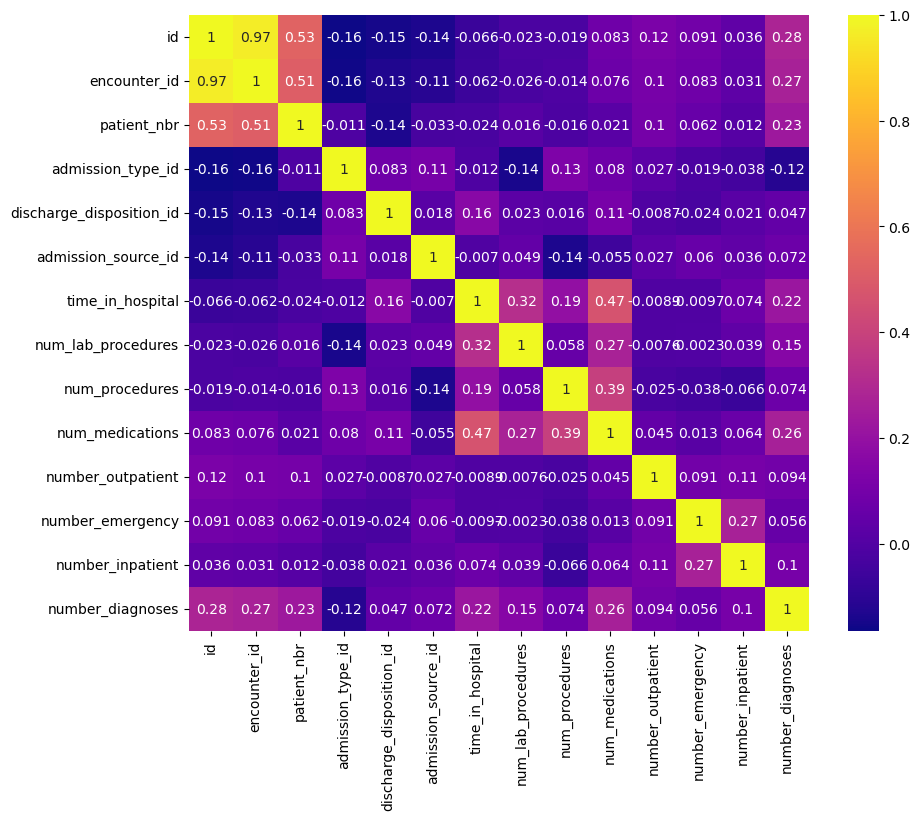

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="plasma")

# Target column is "Readmitted"

In [12]:
df.std()

id                          2.937746e+04
encounter_id                1.026403e+08
patient_nbr                 3.869636e+07
admission_type_id           1.445403e+00
discharge_disposition_id    5.280166e+00
admission_source_id         4.064081e+00
time_in_hospital            2.985108e+00
num_lab_procedures          1.967436e+01
num_procedures              1.705807e+00
num_medications             8.127566e+00
number_outpatient           1.267265e+00
number_emergency            9.304723e-01
number_inpatient            1.262863e+00
number_diagnoses            1.933600e+00
dtype: float64

In [13]:
# Weight has a lot of missing values, but we cant drop it because it is a very significant column
# Weight column has to be imputed

In [14]:
df1=df[["age","weight","race"]]

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
df["readmitted"]=df["readmitted"].map(lambda x:"YES" if (x==">30")|(x=="<30") else x)

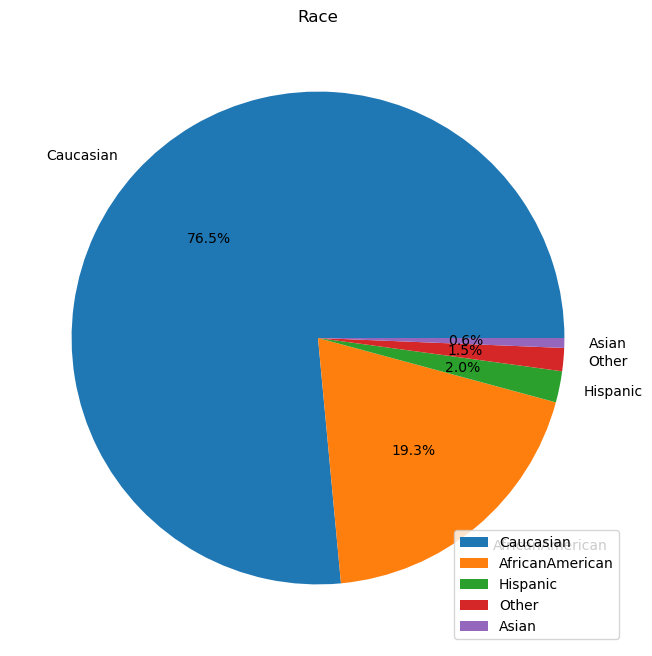

In [18]:
# Race pie chart
r_counts=df["race"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("Race")
plt.legend()
plt.show()

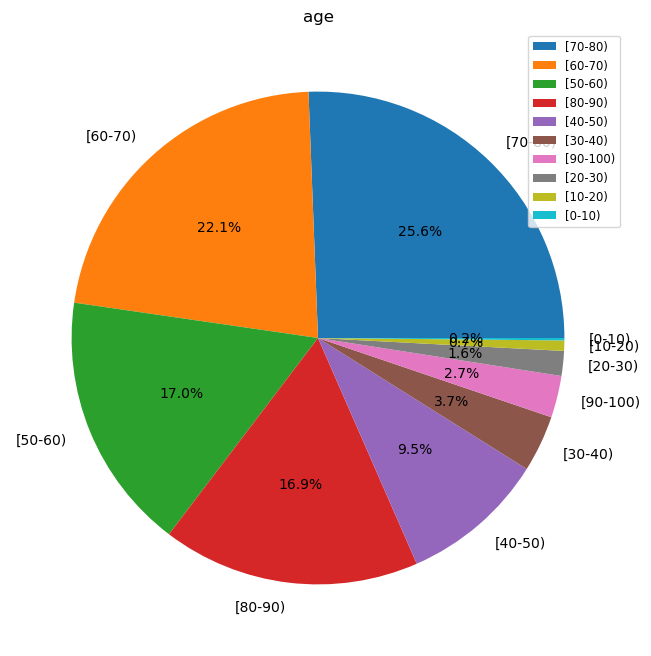

In [19]:
# Age pie chart
r_counts=df["age"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("age")
plt.legend(loc='upper right', fontsize='small')
plt.show()

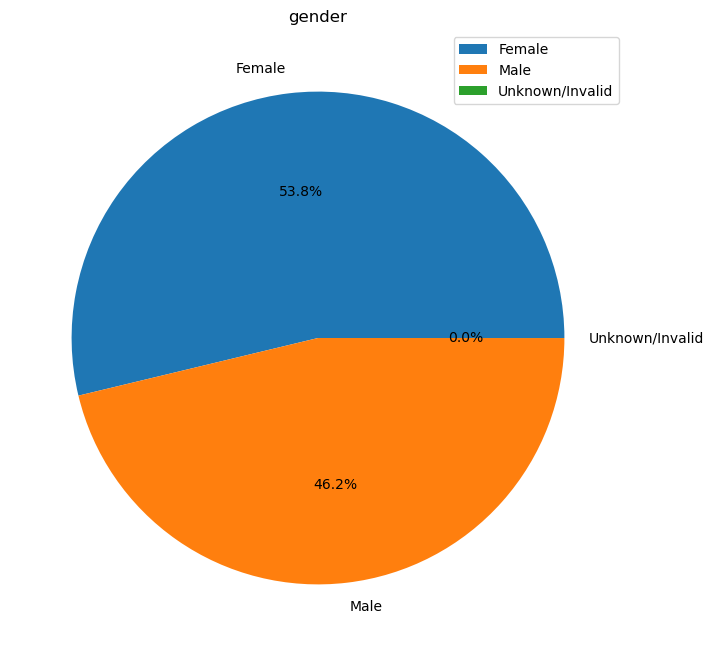

In [20]:
# Gender pie chart
r_counts=df["gender"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("gender")
plt.legend()
plt.show()

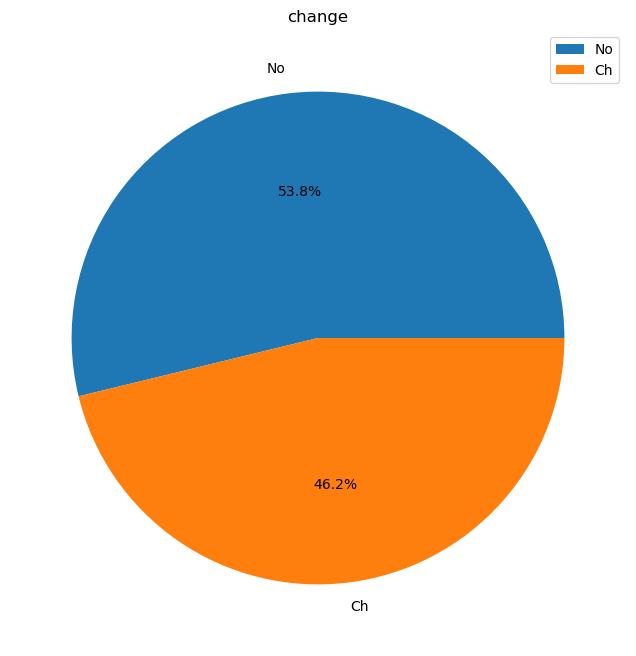

In [21]:
# change pie chart
r_counts=df["change"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("change")
plt.legend()
plt.show()

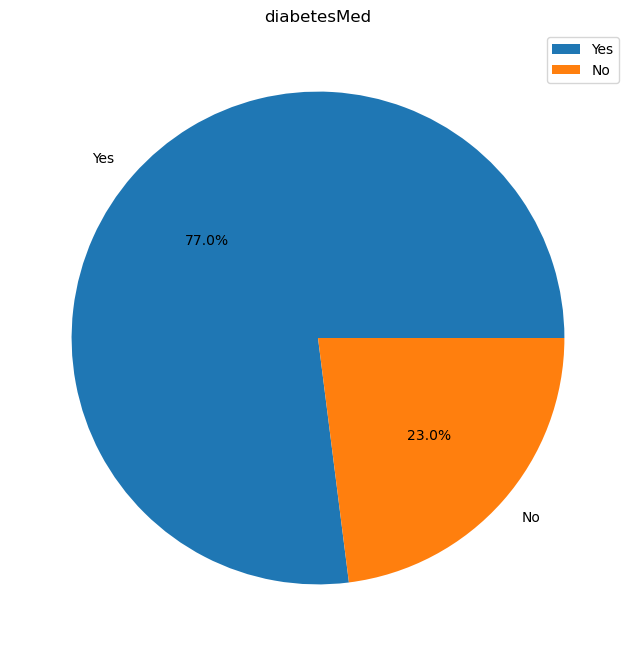

In [22]:
# diabetesMed pie chart
r_counts=df["diabetesMed"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("diabetesMed")
plt.legend()
plt.show()

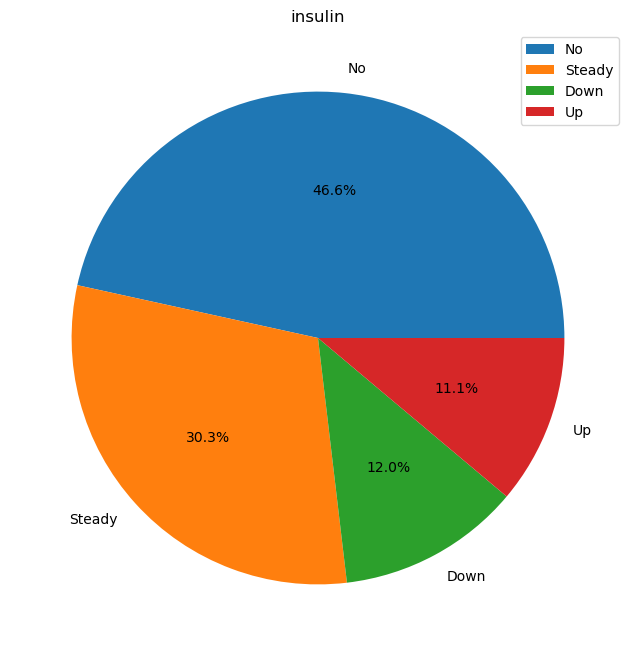

In [23]:
# insulin pie chart
r_counts=df["insulin"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("insulin")
plt.legend()
plt.show()

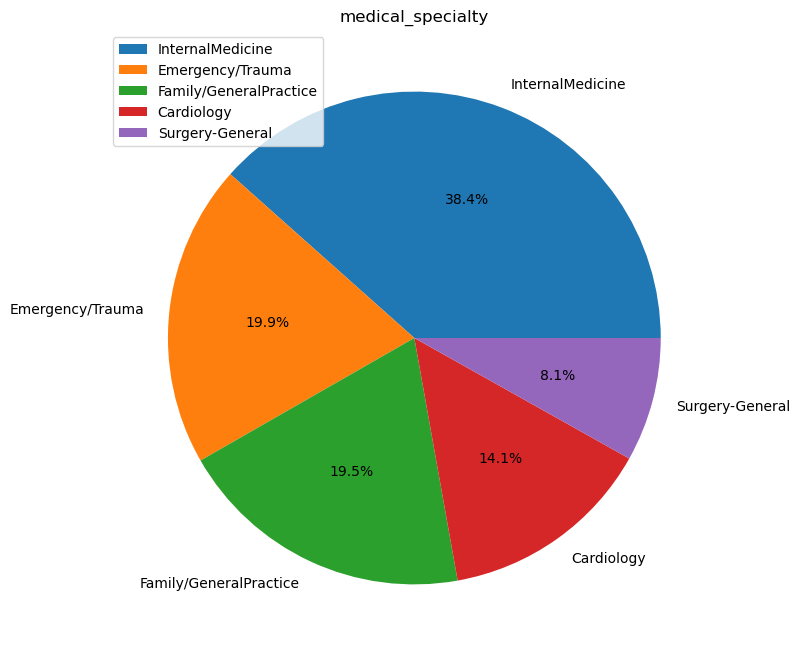

In [24]:
# Medical Speciality(TOP 5) pie chart
r_counts=df["medical_specialty"].value_counts().head()
plt.figure(figsize=(10, 8))
plt.pie(r_counts,labels=r_counts.index,autopct="%1.1f%%")
plt.title("medical_specialty")
plt.legend(loc="upper left")
plt.show()

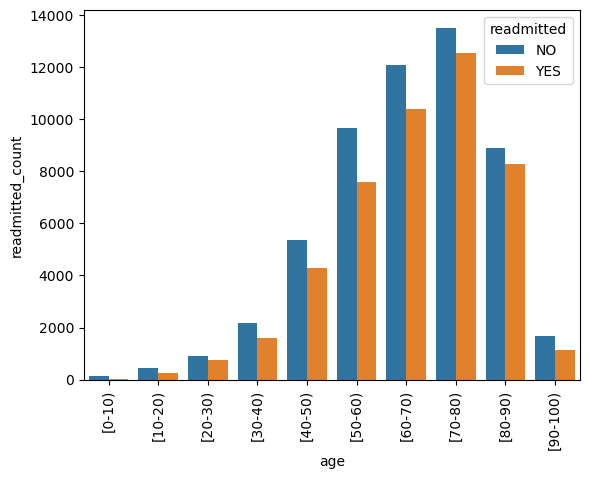

In [27]:
# AGE v/s Readmitted
df_r=pd.DataFrame(df.groupby("age")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["age"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.xticks(rotation=90)
plt.show()

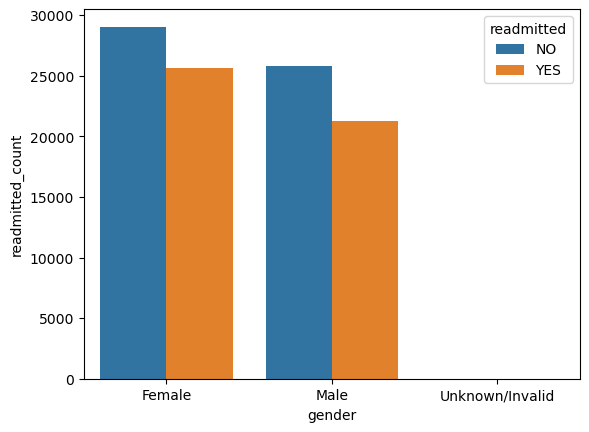

In [30]:
# Gender v/s Readmitted
df_r=pd.DataFrame(df.groupby("gender")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["gender"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

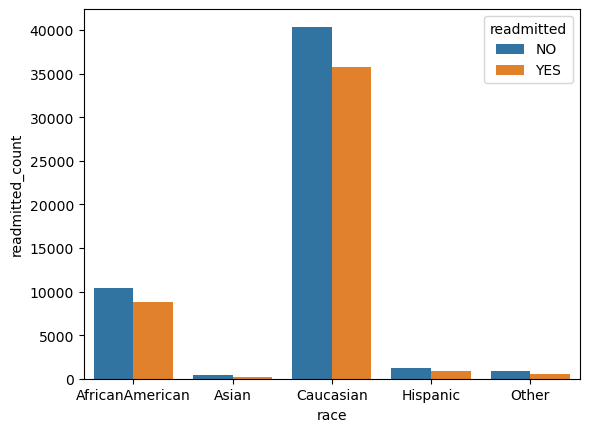

In [31]:
# Race v/s Readmitted
df_r=pd.DataFrame(df.groupby("race")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["race"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

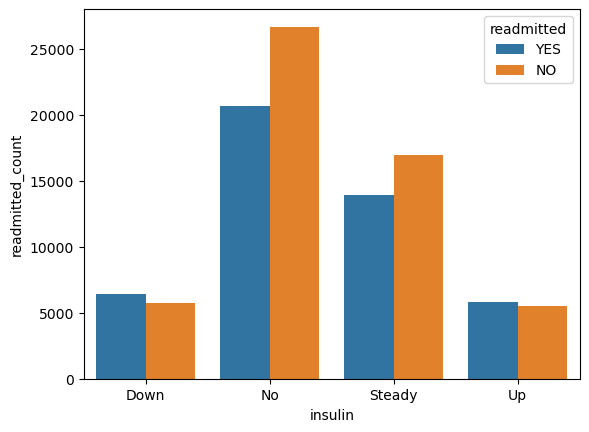

In [32]:
# insulin v/s readmitted
df_r=pd.DataFrame(df.groupby("insulin")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["insulin"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

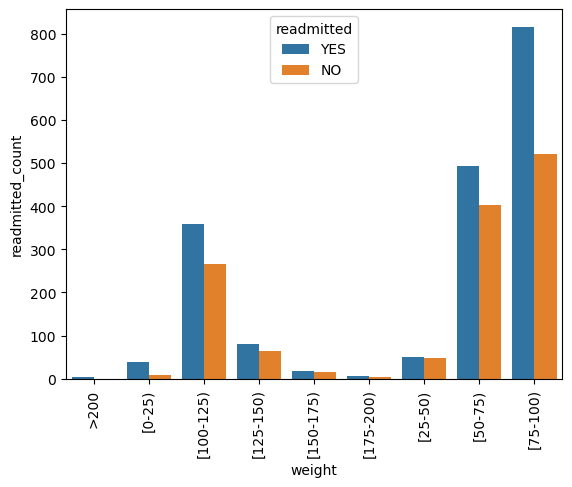

In [33]:
# weight v/s readmitted
df_r=pd.DataFrame(df.groupby("weight")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["weight"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.xticks(rotation=90)
plt.show()

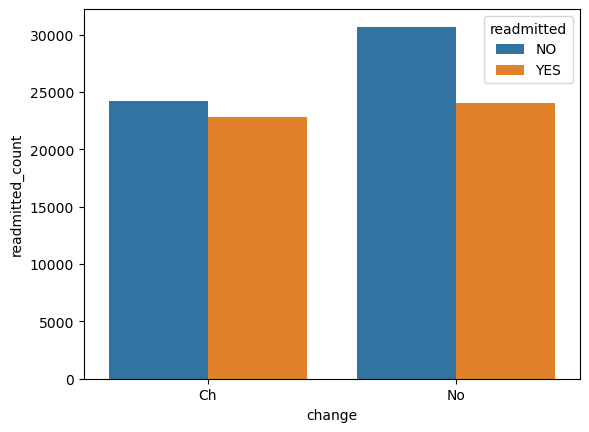

In [34]:
# change v/s readmitted
df_r=pd.DataFrame(df.groupby("change")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["change"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

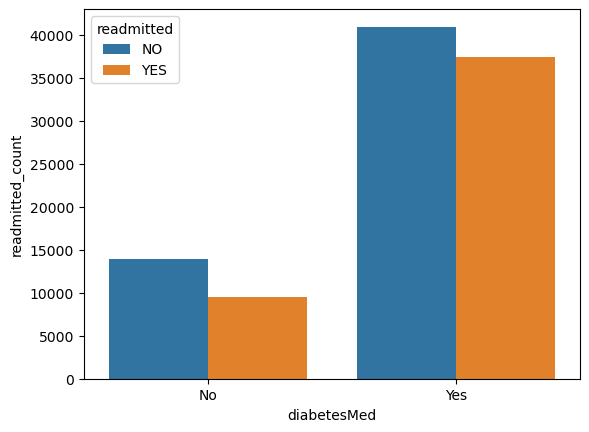

In [35]:
# DiabetesMed v/s readmitted
df_r=pd.DataFrame(df.groupby("diabetesMed")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["diabetesMed"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

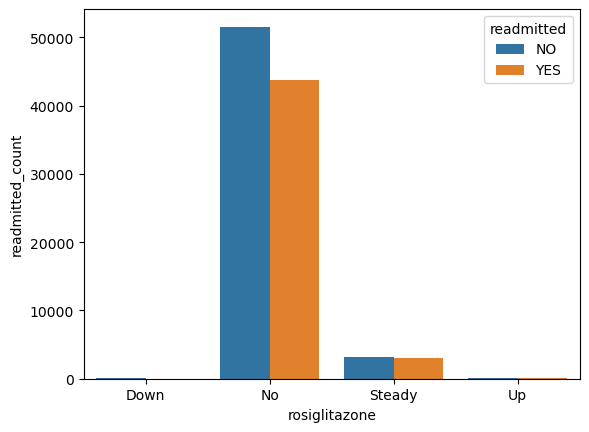

In [36]:
# rosiglitazone v/s readmitted
df_r=pd.DataFrame(df.groupby("rosiglitazone")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["rosiglitazone"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

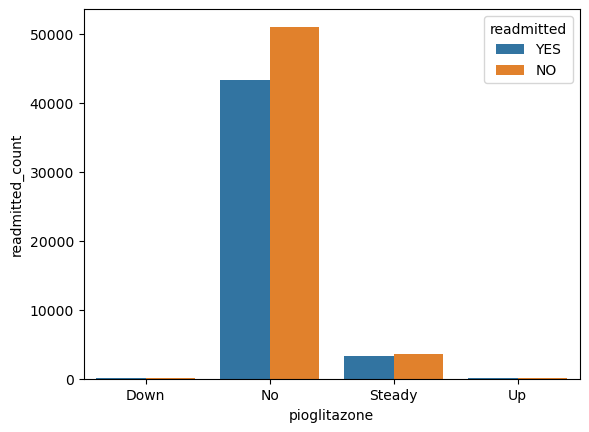

In [37]:
# pioglitazone v/s readmitted
df_r=pd.DataFrame(df.groupby("pioglitazone")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["pioglitazone"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

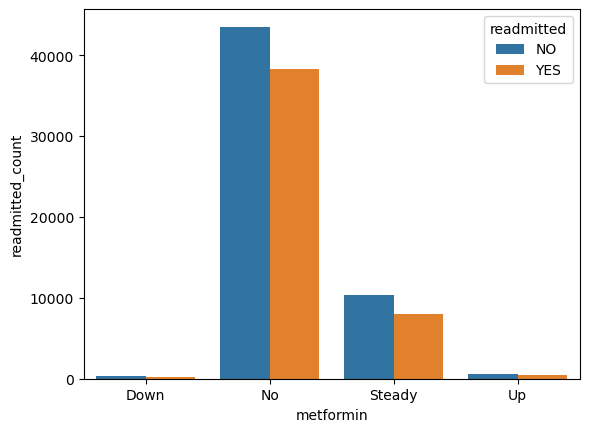

In [38]:
# metformin v/s readmitted
df_r=pd.DataFrame(df.groupby("metformin")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["metformin"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

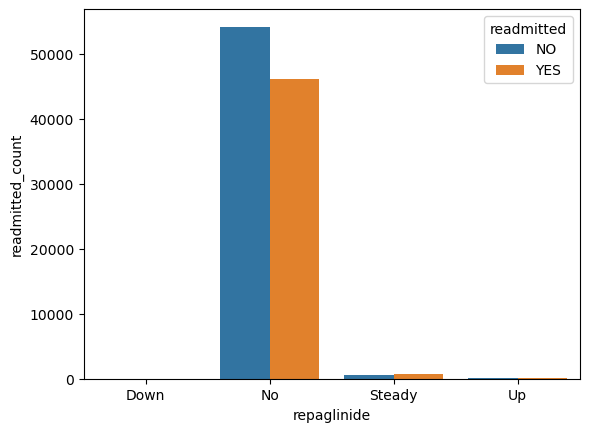

In [39]:
# repaglinide v/s readmitted
df_r=pd.DataFrame(df.groupby("repaglinide")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["repaglinide"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

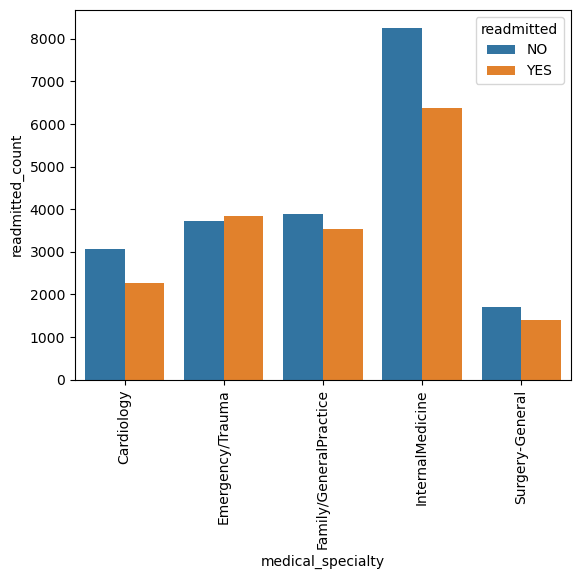

In [40]:
# Medical speciality v/s readmitted
df_z=df[(df["medical_specialty"]=="InternalMedicine")|(df["medical_specialty"]=="Emergency/Trauma")|(df["medical_specialty"]=="Family/GeneralPractice")|(df["medical_specialty"]=="Cardiology")|(df["medical_specialty"]=="Surgery-General")]
df_r=pd.DataFrame(df_z.groupby("medical_specialty")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["medical_specialty"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.xticks(rotation=90)
plt.show()
# NOTE: This is only for top 5 medical_speciality

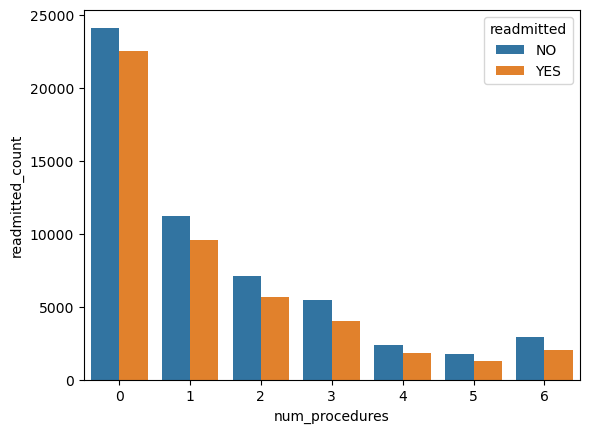

In [41]:
# num_procedures v/s readmitted
df_r=pd.DataFrame(df.groupby("num_procedures")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["num_procedures"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

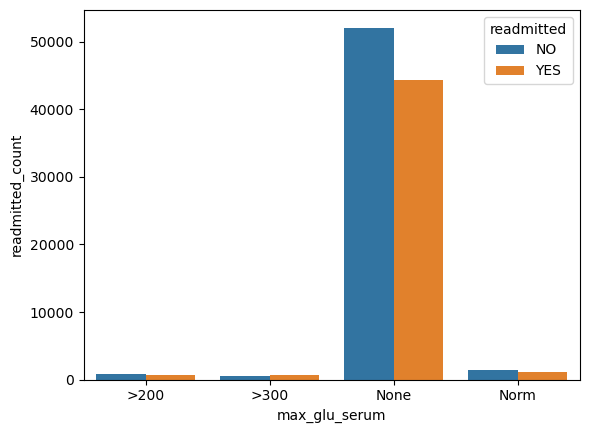

In [42]:
# max_glu_serum v/s readmitted
df_r=pd.DataFrame(df.groupby("max_glu_serum")["readmitted"].value_counts())
df_r.rename(columns={"readmitted":"readmitted_count"},inplace=True)
df_r.reset_index(inplace=True)
sns.barplot(x=df_r["max_glu_serum"],y=df_r["readmitted_count"],hue=df_r["readmitted"])
plt.show()

In [43]:
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,YES
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Statistical Analysis

In [71]:
df.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [73]:
# Hypothesis Testing
# target vs categorical fearures
# H0: There is no significant difference between target and features
# H1: There is significant difference between target and features
from scipy.stats import chi2_contingency
for i in df.select_dtypes(include='object').columns:
    if i!="readmitted":
        print(i)
        pval = chi2_contingency(pd.crosstab(df["readmitted"],df[i]))[1]
        if pval<0.05:
            print("Reject H0")
        else:
            print("Accept H0")
        print("--------------------------------------------------")

race
Reject H0
--------------------------------------------------
gender
Reject H0
--------------------------------------------------
age
Reject H0
--------------------------------------------------
weight
Reject H0
--------------------------------------------------
payer_code
Reject H0
--------------------------------------------------
medical_specialty
Reject H0
--------------------------------------------------
diag_1
Reject H0
--------------------------------------------------
diag_2
Reject H0
--------------------------------------------------
diag_3
Reject H0
--------------------------------------------------
max_glu_serum
Reject H0
--------------------------------------------------
A1Cresult
Reject H0
--------------------------------------------------
metformin
Reject H0
--------------------------------------------------
repaglinide
Reject H0
--------------------------------------------------
nateglinide
Accept H0
--------------------------------------------------
chlorpropamide


In [78]:
num_df = df.select_dtypes(include='number')
num_df.drop(columns=['id','encounter_id','patient_nbr'], inplace=True)

## Numeric features vs target
### ANOVA (Analysis of Variance):

* Purpose: ANOVA tests whether the means of continuous features are equal across different categories of the categorical target variable.
* Null Hypothesis (H0): The means of continuous features are equal across categories of the categorical target.

In [88]:
# continuous features vs categorical target
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import OLS

x = num_df
y = df['readmitted'].map({'NO': 0, 'YES': 1}).astype(int)
model_ols = OLS(y, sm.add_constant(x)).fit()
# Print ANOVA summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             readmitted   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     626.3
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:37:21   Log-Likelihood:                -70215.
No. Observations:              101766   AIC:                         1.405e+05
Df Residuals:                  101754   BIC:                         1.406e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [89]:
print(model_ols.summary2())

                     Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.063      
Dependent Variable:    readmitted        AIC:                 140454.0985
Date:                  2023-09-26 22:40  BIC:                 140568.4637
No. Observations:      101766            Log-Likelihood:      -70215.    
Df Model:              11                F-statistic:         626.3      
Df Residuals:          101754            Prob (F-statistic):  0.00       
R-squared:             0.063             Scale:               0.23274    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
const                     0.2041   0.0074  27.7078 0.0000  0.1896  0.2185
admission_type_id         0.0065   0.0011   5.8796 0.0000  0.0043  0.0086
discharge_disposition_id -0.0026   0.0003  -9.0563 0.0000 -

### Mann-Whitney U Test (for binary categorical target):

* Purpose: Mann-Whitney U tests whether the distributions of continuous features differ between two categories of a binary categorical target.
* Null Hypothesis (H0): The distributions of continuous features are equal between the two categories of the categorical target.

In [93]:
# Mann-Whitney u test
from scipy.stats import mannwhitneyu


for i in num_df.columns:
    print(i)
    group1 = df[i][df['readmitted'] == 'YES']
    group2 = df[i][df['readmitted'] == 'NO']
    stat, p = mannwhitneyu(group1, group2)
    print("Mann-Whitney U Statistic:", stat)
    print("p-value:", p)
    if pval<0.05:
        print('Reject H0, the two groups are not significantly different')
    else:
        print('Fail to reject H0, the two groups are significantly different')
    print('----------------------------------------------------------------------------')


admission_type_id
Mann-Whitney U Statistic: 1256659983.0
p-value: 2.475806493812716e-12
Reject H0, the two groups are not significantly different
----------------------------------------------------------------------------
discharge_disposition_id
Mann-Whitney U Statistic: 1304139309.0
p-value: 2.3796752241561238e-05
Reject H0, the two groups are not significantly different
----------------------------------------------------------------------------
admission_source_id
Mann-Whitney U Statistic: 1365808141.5
p-value: 1.278567400485255e-80
Reject H0, the two groups are not significantly different
----------------------------------------------------------------------------
time_in_hospital
Mann-Whitney U Statistic: 1376770775.5
p-value: 2.116668190051554e-84
Reject H0, the two groups are not significantly different
----------------------------------------------------------------------------
num_lab_procedures
Mann-Whitney U Statistic: 1347620226.0
p-value: 5.505698969871248e-39
Reject H0,

# Model Building

In [122]:
from sklearn.model_selection import train_test_split
dfc = df.dropna()
x = dfc.drop(['diabetesMed'], axis=1)
y = dfc['diabetesMed']
x.drop(columns = ['id','encounter_id','patient_nbr','weight'],inplace=True)


In [123]:
df_cat = pd.get_dummies(x.select_dtypes(include=['object']),drop_first=True)

In [124]:
df_combined = pd.concat([df_cat,dfc.select_dtypes(include=['number'])],axis=1)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=10)

In [126]:
# Base model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
    ('rf', rf)
])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.9712918660287081

In [127]:
df_combined

,race_Asian,race_Caucasian,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_OT,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_Dentistry,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_ObstetricsandGynecology,medical_specialty_Pediatrics,medical_specialty_Psychiatry,medical_specialty_Surgery-General,diag_1_153,diag_1_154,diag_1_155,diag_1_157,diag_1_162,diag_1_174,diag_1_182,diag_1_185,diag_1_188,diag_1_189,diag_1_193,diag_1_196,diag_1_197,diag_1_198,diag_1_201,diag_1_202,diag_1_204,diag_1_211,diag_1_218,diag_1_220,diag_1_225,diag_1_230,diag_1_233,diag_1_236,diag_1_239,diag_1_241,diag_1_246,diag_1_250,diag_1_250.01,diag_1_250.02,diag_1_250.11,diag_1_250.12,diag_1_250.13,diag_1_250.2,diag_1_250.22,diag_1_250.3,diag_1_250.4,diag_1_250.41,diag_1_250.6,diag_1_250.7,diag_1_250.8,diag_1_250.81,diag_1_250.82,diag_1_250.83,diag_1_250.92,diag_1_252,diag_1_274,diag_1_276,diag_1_280,diag_1_284,diag_1_285,diag_1_287,diag_1_288,diag_1_292,diag_1_294,diag_1_295,diag_1_296,diag_1_297,diag_1_310,diag_1_331,diag_1_340,diag_1_346,diag_1_35,diag_1_351,diag_1_353,diag_1_38,diag_1_386,diag_1_398,diag_1_401,diag_1_402,diag_1_403,diag_1_404,diag_1_405,diag_1_410,diag_1_411,diag_1_413,diag_1_414,diag_1_415,diag_1_424,diag_1_425,diag_1_426,diag_1_427,diag_1_428,diag_1_429,diag_1_430,diag_1_431,diag_1_432,diag_1_433,diag_1_434,diag_1_435,diag_1_437,diag_1_438,diag_1_440,diag_1_443,diag_1_447,diag_1_453,diag_1_455,diag_1_456,diag_1_458,diag_1_459,diag_1_465,diag_1_466,diag_1_482,diag_1_486,diag_1_490,diag_1_491,diag_1_493,diag_1_507,diag_1_511,diag_1_515,diag_1_518,diag_1_53,diag_1_530,diag_1_531,diag_1_532,diag_1_534,diag_1_535,diag_1_536,diag_1_537,diag_1_550,diag_1_552,diag_1_553,diag_1_555,diag_1_557,diag_1_558,diag_1_560,diag_1_562,diag_1_564,diag_1_566,diag_1_569,diag_1_572,diag_1_574,diag_1_575,diag_1_576,diag_1_577,diag_1_578,diag_1_579,diag_1_584,diag_1_590,diag_1_591,diag_1_592,diag_1_593,diag_1_599,diag_1_600,diag_1_604,diag_1_617,diag_1_618,diag_1_626,diag_1_641,diag_1_642,diag_1_644,diag_1_648,diag_1_658,diag_1_659,diag_1_664,diag_1_682,diag_1_707,diag_1_710,diag_1_711,diag_1_715,diag_1_716,diag_1_721,diag_1_722,diag_1_724,diag_1_726,diag_1_727,diag_1_728,diag_1_729,diag_1_733,diag_1_736,diag_1_756,diag_1_780,diag_1_782,diag_1_784,diag_1_785,diag_1_786,diag_1_787,diag_1_789,diag_1_790,diag_1_799,diag_1_8,diag_1_805,diag_1_808,diag_1_812,diag_1_816,diag_1_820,diag_1_824,diag_1_840,diag_1_850,diag_1_852,diag_1_865,diag_1_873,diag_1_881,diag_1_891,diag_1_924,diag_1_965,diag_1_996,diag_1_997,diag_1_998,diag_1_V45,diag_1_V53,diag_1_V54,diag_1_V55,diag_1_V58,diag_1_V71,diag_2_135,diag_2_136,diag_2_151,diag_2_153,diag_2_154,diag_2_156,diag_2_162,diag_2_188,diag_2_193,diag_2_196,diag_2_197,diag_2_198,diag_2_199,diag_2_200,diag_2_202,diag_2_203,diag_2_204,diag_2_205,diag_2_211,diag_2_214,diag_2_218,diag_2_233,diag_2_245,diag_2_250,diag_2_250.01,diag_2_250.02,diag_2_250.11,diag_2_250.13,diag_2_250.2,diag_2_250.4,diag_2_250.41,diag_2_250.51,diag_2_250.6,diag_2_250.81,diag_2_250.92,diag_2_255,diag_2_272,diag_2_276,diag_2_277,diag_2_278,diag_2_280,diag_2_284,diag_2_285,diag_2_287,diag_2_288,diag_2_289,diag_2_292,diag_2_295,diag_2_296,diag_2_300,diag_2_303,diag_2_304,diag_2_305,diag_2_324,diag_2_327,diag_2_331,diag_2_332,diag_2_342,diag_2_345,diag_2_348,diag_2_356,diag_2_357,diag_2_378,diag_2_38,diag_2_394,diag_2_396,diag_2_401,diag_2_402,diag_2_403,diag_2_404,diag_2_41,diag_2_410,diag_2_411,diag_2_412,diag_2_413,diag_2_414,diag_2_424,diag_2_425,diag_2_426,diag_2_427,diag_2_428,diag_2_434,diag_2_435,diag_2_440,diag_2_442,diag_2_453,diag_2_455,diag_2_456,diag_2_458,diag_2_459,diag_2_464,diag_2_466,diag_2_473,diag_2_475,diag_2_478,diag_2_486,diag_2_490,diag_2_491,diag_2_493,diag_2_496,diag_2_511,diag_2_512,diag_2_515,diag_2_

In [159]:
from sklearn.model_selection import train_test_split
dfc = df.dropna()
x = dfc.drop(['readmitted'], axis=1)
y = dfc['readmitted']
x.drop(columns = ['id','encounter_id','patient_nbr','weight','diag_1','diag_2','diag_3'],inplace=True)


In [160]:
df_cat = pd.get_dummies(x.select_dtypes(include=['object']),drop_first=True)

In [161]:
df_combined = pd.concat([df_cat,dfc.select_dtypes(include=['number'])],axis=1)

In [162]:
x_train, x_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=10)

In [138]:
# Base model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
    ('rf', rf)
])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.6555023923444976

In [141]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.60      0.58      0.59        90
         YES       0.69      0.71      0.70       119

    accuracy                           0.66       209
   macro avg       0.65      0.65      0.65       209
weighted avg       0.65      0.66      0.65       209



In [142]:
x.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
27068,Caucasian,Female,[70-80),3,3,1,10,UN,Surgery-General,65,1,28,1,1,3,9,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes
27128,Caucasian,Male,[80-90),1,11,5,6,UN,Family/GeneralPractice,73,0,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes
27147,Caucasian,Male,[60-70),1,1,7,2,CP,Cardiology,58,3,12,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
27186,Caucasian,Male,[40-50),1,3,7,3,DM,Psychiatry,33,0,7,4,3,6,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
27236,Caucasian,Male,[50-60),3,1,1,2,BC,Surgery-General,5,4,11,0,0,0,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


In [199]:
df.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [202]:
dfc_new = df.drop(columns=['id','encounter_id','patient_nbr','weight','diag_1','diag_2','diag_3','payer_code','medical_specialty'])

In [204]:
dfc_new.dropna(inplace=True)

In [143]:
from sklearn.model_selection import train_test_split
dfc = df.dropna()
x = dfc.drop(['change'], axis=1)
y = dfc['change']
x.drop(columns = ['id','encounter_id','patient_nbr','weight','diag_1','diag_2','diag_3'],inplace=True)


In [144]:
df_cat = pd.get_dummies(x.select_dtypes(include=['object']),drop_first=True)

In [145]:
df_combined = pd.concat([df_cat,dfc.select_dtypes(include=['number'])],axis=1)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(df_combined, y, test_size=0.2, random_state=10)

In [147]:
# Base model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
    ('rf', rf)
])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.9473684210526315

In [150]:
y_pred_train = pipe.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          Ch       1.00      1.00      1.00       240
          No       1.00      1.00      1.00       594

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834



In [148]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          Ch       0.93      0.88      0.90        57
          No       0.95      0.97      0.96       152

    accuracy                           0.95       209
   macro avg       0.94      0.93      0.93       209
weighted avg       0.95      0.95      0.95       209



In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 50,   7],
       [  4, 148]], dtype=int64)

In [166]:
df_combined = pd.concat([df_cat,dfc.select_dtypes(include=['number'])],axis=1)

In [197]:
df_combined.shape

(1043, 72)

In [173]:
Y = y.map({'NO': 0, 'YES': 1})

In [174]:
df_db = pd.concat([df_combined, Y],axis=1)

In [175]:
# split the dataframe into 2 parts using dbscan

from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_db)
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [189]:
labels = dbscan.fit_predict(df_db)
df_cluster = pd.DataFrame(labels, columns=['cluster'])

In [196]:
df_db.shape

(1043, 73)

In [190]:
# add the labels to the dataframe
Labels = pd.Series(dbscan.labels_.reshape)
df_db_labels = pd.concat([df_db, df_cluster], axis=1)

In [191]:
df_db_labels.head()

,race_Asian,race_Caucasian,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),payer_code_CM,payer_code_CP,payer_code_DM,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_OT,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_Dentistry,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_ObstetricsandGynecology,medical_specialty_Pediatrics,medical_specialty_Psychiatry,medical_specialty_Surgery-General,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_Steady,repaglinide_Up,nateglinide_Steady,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Steady,acarbose_Steady,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,cluster
27068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27069.0,88792836.0,100654011.0,3.0,3.0,1.0,10.0,65.0,1.0,28.0,1.0,1.0,3.0,9.0,1.0,NaN
27128,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,27129.0,88986678.0,58682736.0,1.0,11.0,5.0,6.0,73.0,0.0,16.0,0.0,0.0,0.0,9.0,0.0,NaN
27147,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,27148.0,89032962.0,69250302.0,1.0,1.0,7.0,2.0,58.0,3.0,12.0,0.0,0.0,0.0,9.0,1.0,NaN
27186,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,27187.0,89191392.0,62022042.0,1.0,3.0,7.0,3.0,33.0,0.0,7.0,4.0,3.0,6.0,9.0,1.0,NaN
27236,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,27237.0,89277516.0,30950811.0,3.0,1.0,1.0,2.0,5.0,4.0,11.0,0.0,0.0,0.0,7.0,1.0,NaN


In [205]:
from sklearn.model_selection import train_test_split
x = dfc_new.drop(['readmitted'], axis=1)
y = dfc_new['readmitted']

In [228]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # Use sparse=False to get a dense array, drop the first category

categorical_cols = x.select_dtypes(include=['object']).columns
encoded_categorical = encoder.fit_transform(x[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))
encoded_categorical_df.head()


,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide.metformin_No,glyburide.metformin_Steady,glyburide.metformin_Up,glipizide.metformin_Steady,glimepiride.pioglitazone_Steady,metformin.pioglitazone_Steady,change_No,diabetesMed_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [235]:
df_combined = pd.concat([encoded_categorical_df,x.select_dtypes(include=['number'])],axis=1)

In [236]:
df_combined_y = pd.concat([df_combined,y],axis=1)

In [237]:
df_combined_y.shape

(101697, 82)

In [239]:
df_combined_y.isnull().sum()

race_Asian           2204
race_Caucasian       2204
race_Hispanic        2204
race_Other           2204
gender_Male          2204
                     ... 
number_outpatient    2204
number_emergency     2204
number_inpatient     2204
number_diagnoses     2204
readmitted           2204
Length: 82, dtype: int64

In [243]:
df_combined_y.dropna(inplace=True)

In [265]:
for i in df_combined_y.columns:
    print(i)
    print(df_combined_y[i].value_counts())
    print('----------------------------------------------------------------')

race_Asian
0.0    96670
1.0      619
Name: race_Asian, dtype: int64
----------------------------------------------------------------
race_Caucasian
1.0    74424
0.0    22865
Name: race_Caucasian, dtype: int64
----------------------------------------------------------------
race_Hispanic
0.0    95299
1.0     1990
Name: race_Hispanic, dtype: int64
----------------------------------------------------------------
race_Other
0.0    95825
1.0     1464
Name: race_Other, dtype: int64
----------------------------------------------------------------
gender_Male
0.0    52352
1.0    44937
Name: gender_Male, dtype: int64
----------------------------------------------------------------
gender_Unknown/Invalid
0.0    97288
1.0        1
Name: gender_Unknown/Invalid, dtype: int64
----------------------------------------------------------------
age_[10-20)
0.0    96618
1.0      671
Name: age_[10-20), dtype: int64
----------------------------------------------------------------
age_[20-30)
0.0    95718
1.

In [266]:
x = df_combined_y.drop(columns='readmitted')
y = df_combined_y['readmitted']
Y = y.map({'NO': 0, 'YES': 1})

In [270]:
x.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=10)

In [272]:
# Base model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
    ('rf', rf)
])
pipe_rf.fit(x_train, y_train)
pipe_rf.score(x_test, y_test)

0.6231884057971014

In [279]:
df_combined_y_db = pd.concat([df_combined_y.drop(columns=['readmitted']),df_combined_y['readmitted'].map({'NO': 0, 'YES': 1})],axis=1)
df_combined_y_db.isnull().sum()

race_Asian           0
race_Caucasian       0
race_Hispanic        0
race_Other           0
gender_Male          0
                    ..
number_outpatient    0
number_emergency     0
number_inpatient     0
number_diagnoses     0
readmitted           0
Length: 82, dtype: int64

In [284]:
# split the dataframe into 2 parts using dbscan

from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
dbscan = DBSCAN(eps=10000, min_samples=1000)
dbscan.fit(df_combined_y_db)
dbscan.labels_

In [281]:
labels = dbscan.labels_
df_cluster = pd.DataFrame(labels, columns=['cluster'])

In [282]:
df_db_labels = pd.concat([df_combined_y_db, df_cluster], axis=1)
df_db_labels.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide.metformin_No,glyburide.metformin_Steady,glyburide.metformin_Up,glipizide.metformin_Steady,glimepiride.pioglitazone_Steady,metformin.pioglitazone_Steady,change_No,diabetesMed_Yes,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,cluster
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0.0,-1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0.0,-1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0.0,-1.0


In [283]:
df_db_labels['cluster'].value_counts()

-1.0    97289
Name: cluster, dtype: int64